# Predicting Employee Retention at Salifort Motors

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

## Step 1: Plan Phase

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
df = pd.read_csv('HR_capstone_dataset.csv')

In [3]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Basic information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Cleaning 

#### Renaming columns

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
df = df.rename(columns={'average_montly_hours':'average_monthly_hours',
                        'time_spend_company':'tenure',
                        'Work_accident':'work_accident',
                        'Department':'department'})
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Missing values

In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

- There are no missing values

#### Duplicated values

In [9]:
df.duplicated().sum()

3008

In [10]:
# Inspecting rows containing duplicates
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


- It is unlikely that about 20% (3008) of the employees had the same response to the survey. Hence, we drop the duplicates.

In [11]:
df = df.drop_duplicates(keep='first')
df.shape

(11991, 10)

#### Checking for outliers

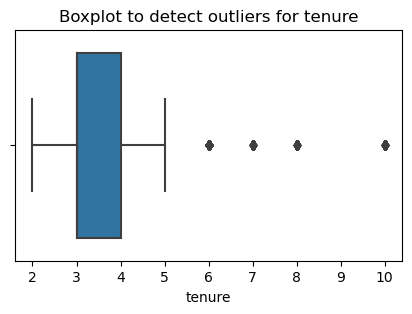

In [12]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='tenure')
plt.title('Boxplot to detect outliers for tenure')
plt.show();

- The tenure feature contain outliers

In [13]:
# determinig number of rows containing outliers
q1 = df['tenure'].quantile(0.25)
q3 = df['tenure'].quantile(0.75)
iqr = q3-q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)

print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)

outliers = df[(df['tenure'] < lower_limit) | (df['tenure'] > upper_limit)]

print('Number of rows containing outliers:', len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers: 824


- Approximately 7% of the data contains outlier and will be dealt wit before modeling.

## Step 2: Analyze

### Exploratory Data Analysis (EDA)

In [14]:
# checking target feature `left`
# Number of employees who stayed vs left
print(df['left'].value_counts())
print()

# Percentage of employees who stayed vs left
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


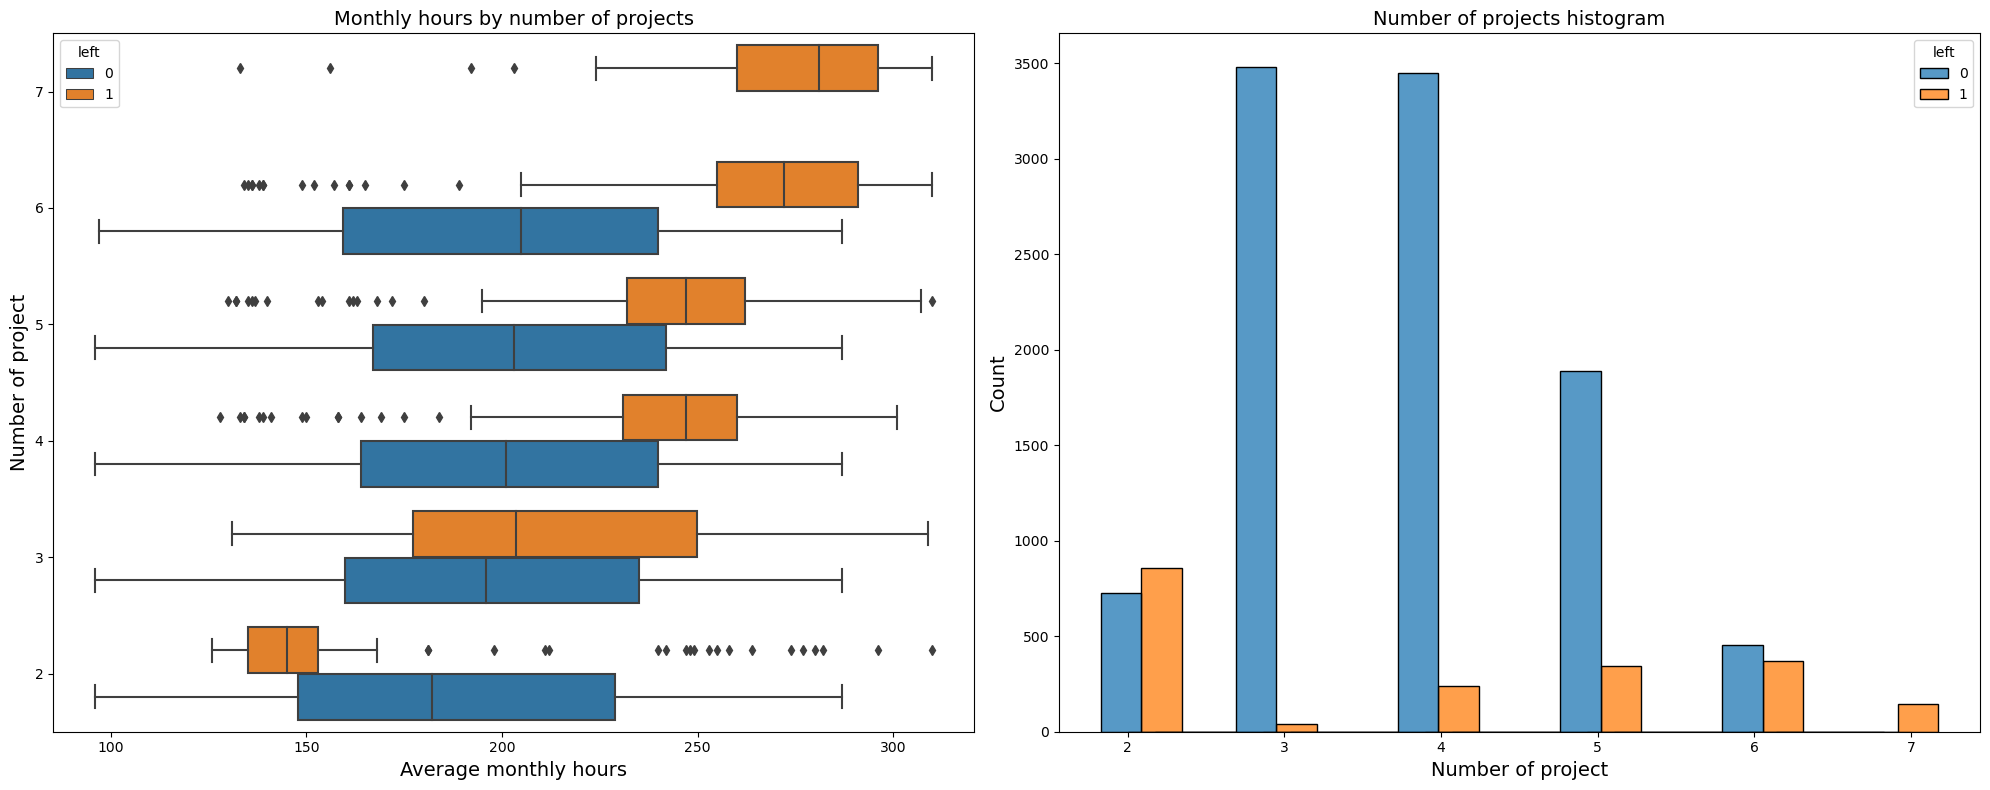

In [15]:
# plot of `satisfaction_level` by `tenure` of people who left
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left',orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_ylabel('Number of project', fontsize=14)
ax[0].set_xlabel('Average monthly hours', fontsize=14)
ax[0].set_title('Monthly hours by number of projects', fontsize=14)

sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize=14)
ax[1].set_xlabel('Number of project', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show();

#### Insight
- The average monthly hours increased as the number of projects increased especially for those who left.
- Everyone with seven project left the company with working hours approximately between 220 - 320 hours.

In [16]:
df[df['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

- This implies that all the employees with 7 projects left.

In [17]:
weekly_work_hours = 40
yearly_work_hours = weekly_work_hours * 52
std_avg_monthly_hours = yearly_work_hours / 12
print('Std work hours(monthly):', round(std_avg_monthly_hours, 2))

Std work hours(monthly): 173.33


- Assuming, there were no holidays and employees work 40hrs/week for 52 weeks, the average monthly hours will be approximately 173hrs.

In [18]:
# Comparing number of employes who work standard hours vs above standard hours
std_hours = len(df[df['average_monthly_hours'] <= 173]['average_monthly_hours'])
above_std_hours = len(df[df['average_monthly_hours'] > 173]['average_monthly_hours'])

print('Number of employees working standard hours:', std_hours)
print('Number of employees working above standard hours:', above_std_hours)

Number of employees working standard hours: 4228
Number of employees working above standard hours: 7763


- More than half the employees where working above average standard monthly hours.

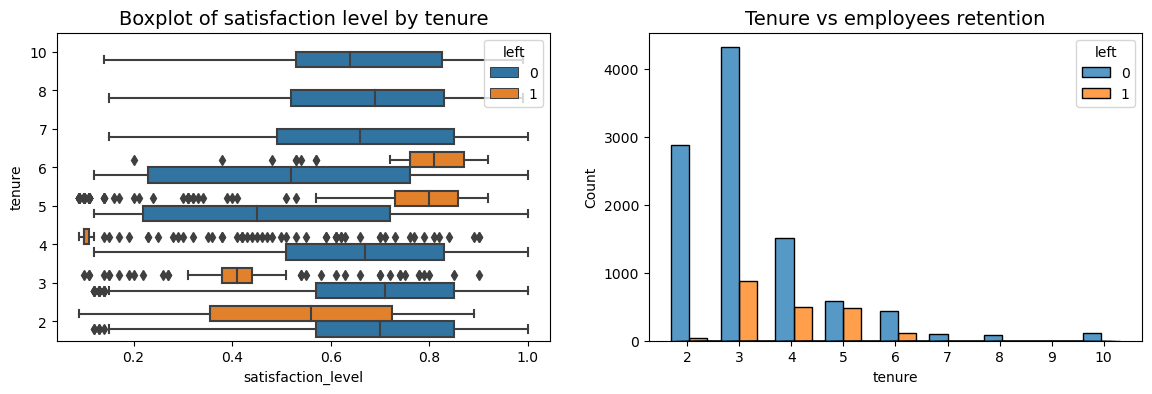

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left',orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Boxplot of satisfaction level by tenure', fontsize=14)

sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=8, ax=ax[1])
ax[1].set_title('Tenure vs employees retention', fontsize=14)
ax[1].set_xticks(range(2, 11, 1))
plt.show();

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

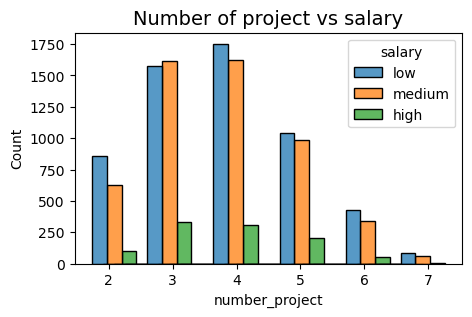

In [20]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='number_project', multiple='dodge', hue='salary', hue_order=['low', 'medium', 'high'], shrink=4)
plt.title('Number of project vs salary', fontsize=14)
plt.show();

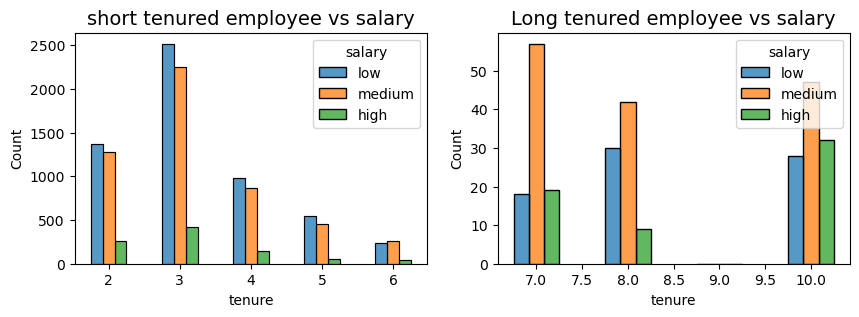

In [21]:
# Relationship between tenure vs average monthly hours
long_tenure = df[df['tenure'] > 6]
short_tenure = df[df['tenure'] <= 6]

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(short_tenure, x='tenure', multiple='dodge', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], shrink=0.5, ax=ax[0])
ax[0].set_title('short tenured employee vs salary', fontsize=14)

sns.histplot(long_tenure, x='tenure', multiple='dodge', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], shrink=0.5, ax=ax[1])
ax[1].set_title('Long tenured employee vs salary', fontsize=14)
plt.show();

- Salary is evenly distributed among employees regardless of tenure.

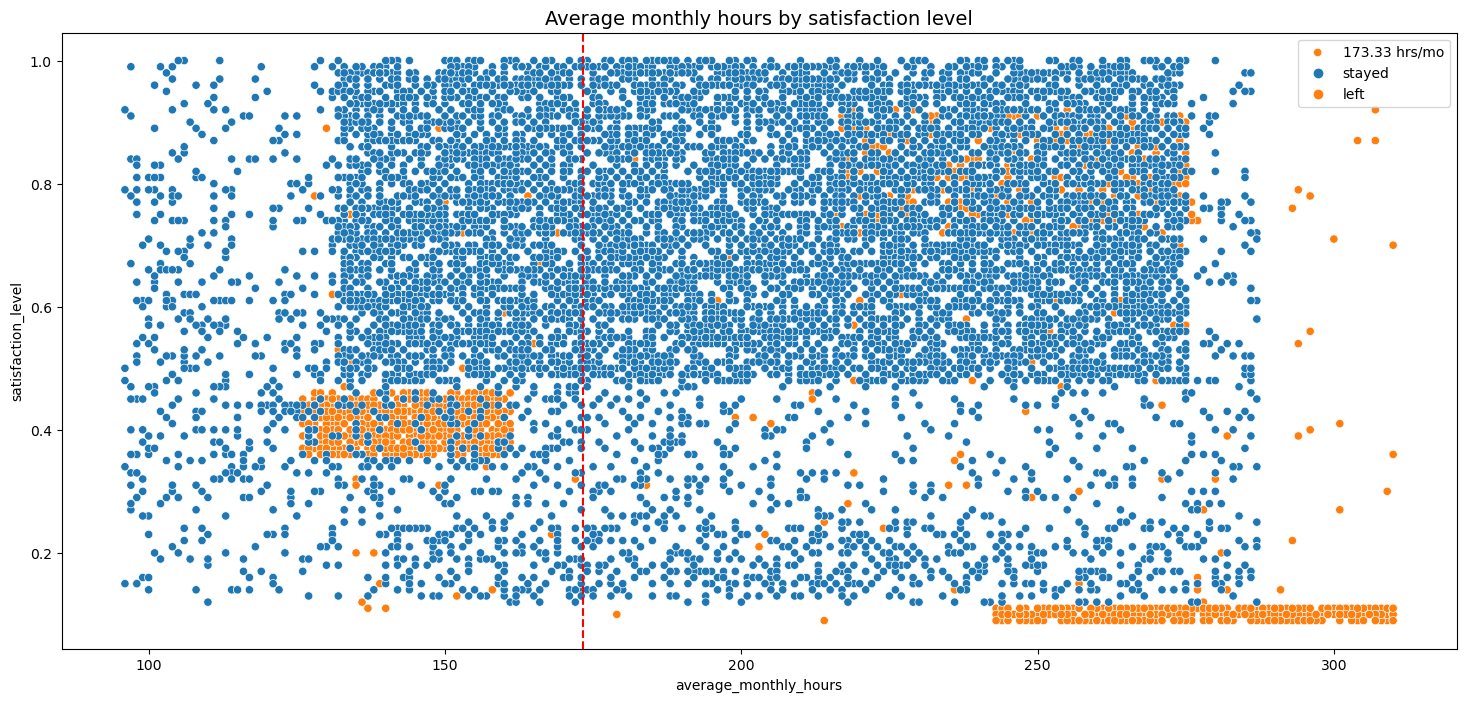

In [22]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left')
plt.axvline(x=173.33, color='r', ls='--', label='173.33 hrs/mo')
plt.legend(labels=['173.33 hrs/mo', 'stayed', 'left'])
plt.title('Average monthly hours by satisfaction level', fontsize=14)
plt.show();

- Evidently, employees who left where employees with lower satisfaction level and longer work hours too.

In [23]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


#### Insight
The average satisfaction level for employees who stayed was higher compared to those who left. Surprisingly, for employees who stayed, we see the average satisfaction level lower than the median, which means the satisfaction level is skewed to the left.

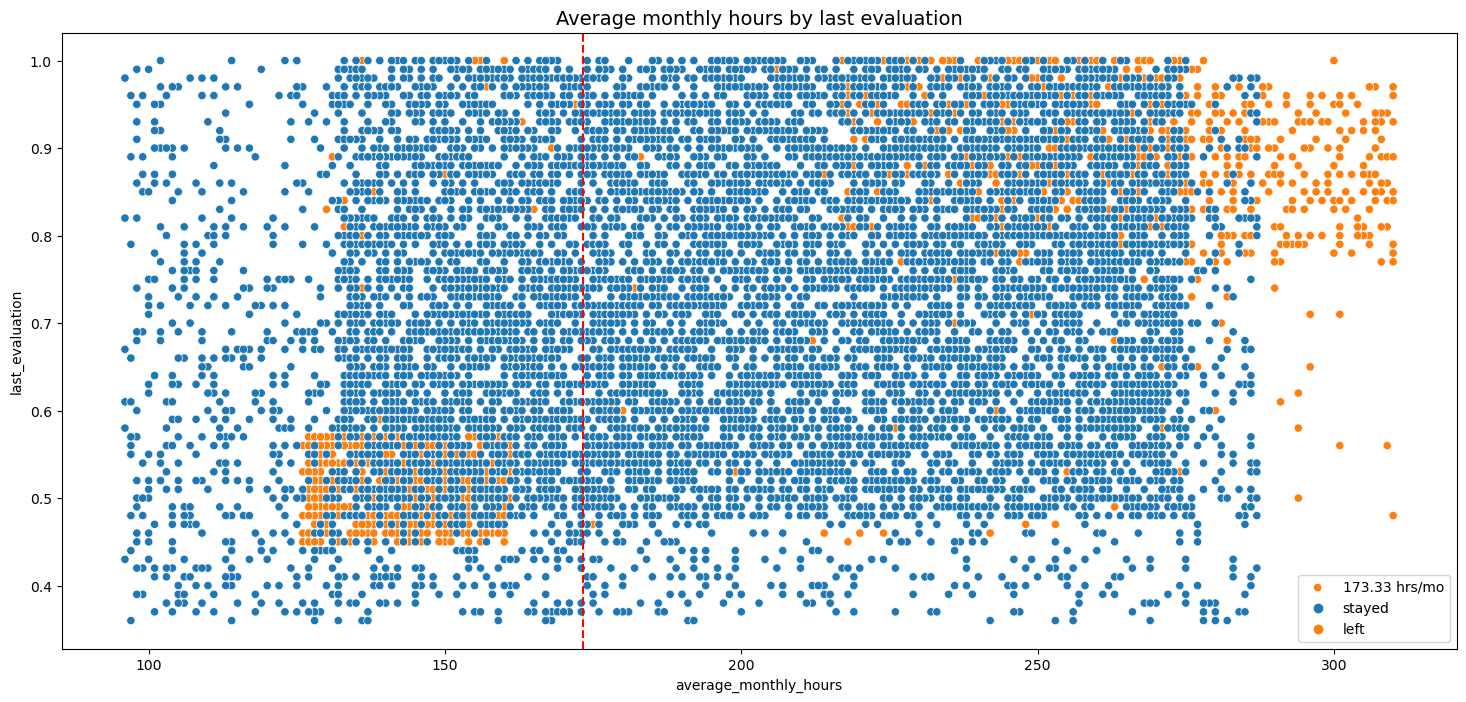

In [24]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left')
plt.axvline(x=173.33, color='r', label='173.33 hrs/mo', ls='--')
plt.legend(labels=['173.33 hrs/mo', 'stayed', 'left'])
plt.title('Average monthly hours by last evaluation', fontsize=14)
plt.show();

#### Insight
We have two groups in this visualization;  
- Group 1 at bottom left show employees who left due to low satisfaction score  
- Group 2 at top right show employees who left due to longer hours

Also, longer working hours doesn't guarantee high evaluation score

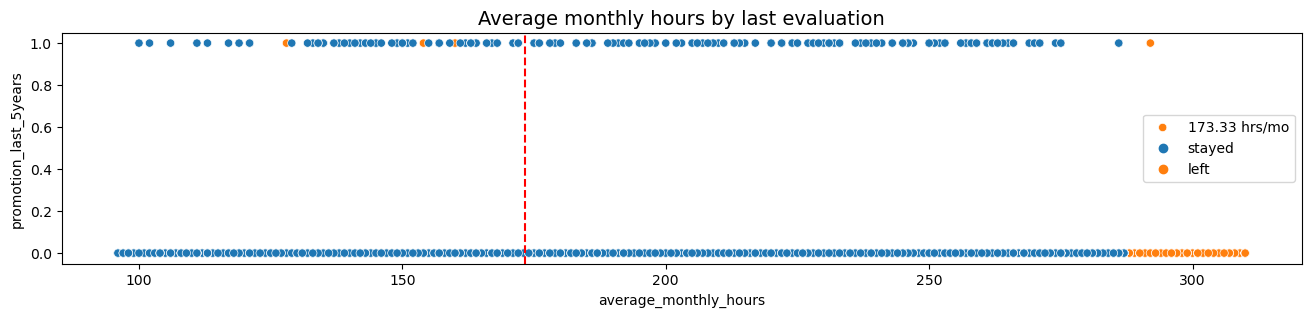

In [25]:
plt.figure(figsize=(16,3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left')
plt.axvline(x=173.33, color='r', label='173.33 hrs/mo', ls='--')
plt.legend(labels=['173.33 hrs/mo', 'stayed', 'left'])
plt.title('Average monthly hours by last evaluation', fontsize=14)
plt.show();

#### Insight
This plot shows employees who left was due to working the longest hours and not being promoted or rewarded for their contribution.

In [26]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

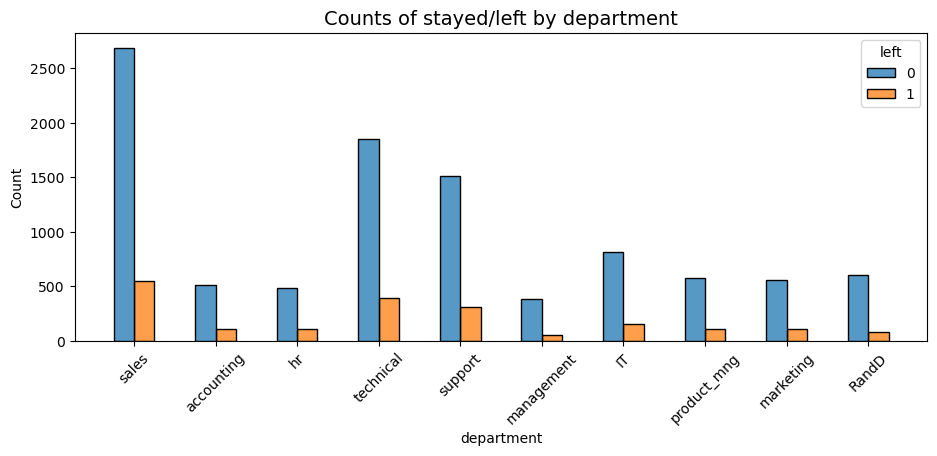

In [27]:
plt.figure(figsize=(11,4))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

- No one department showed distinct proportion betwween employees who stayed vs employees who left.

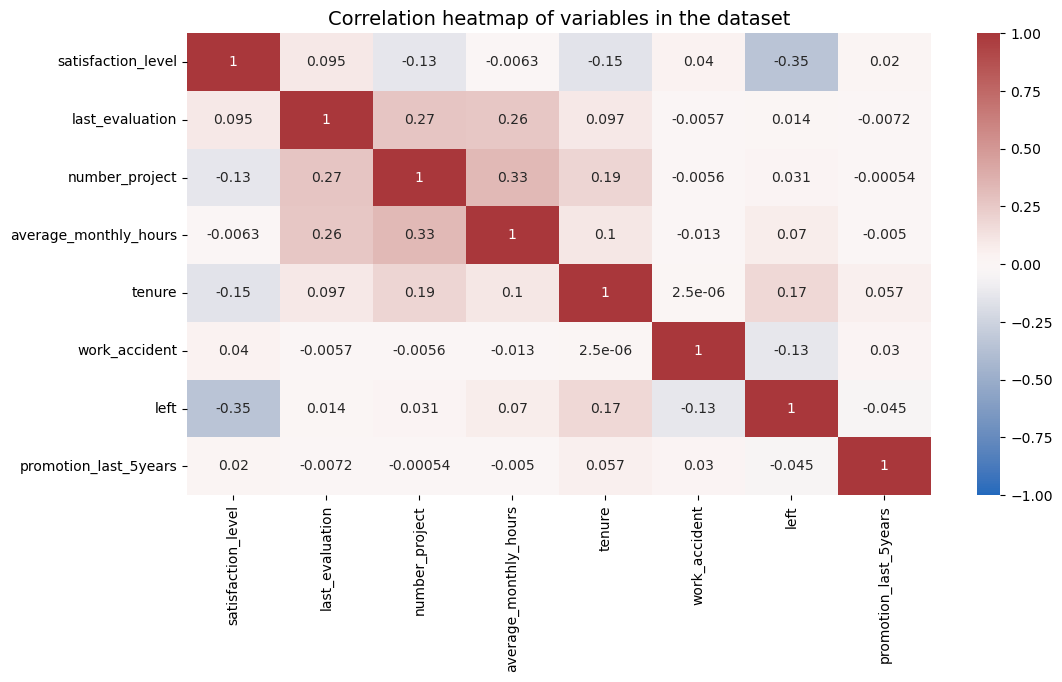

In [28]:
plt.figure(figsize=(12,6))
heatmap = sns.heatmap(data=df.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True,
            cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation heatmap of variables in the dataset', fontsize=14);

- No multicollinearity between features.

### Overall Insight

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

### Next steps
Model construction

In [30]:
df.to_csv('df_model.csv', index=False)